# 目的
以下を計算する
- 外部データセットのラベル数

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import ast

import itertools
from collections import Counter

In [3]:
train = pl.read_json("../data/train.json")
pii_dataset = pl.read_csv("../data/external_pii_dataset.csv")
pii_dataset_fixed = pl.read_csv("../data/pii_dataset_fixed.csv")
moredata_dataset_fixed = pl.read_csv("../data/moredata_dataset_fixed.csv")

In [4]:
pii_dataset = pii_dataset.with_columns(
    pl.col("tokens").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("trailing_whitespace").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("labels").map_elements(lambda x: ast.literal_eval(x)),
)

In [5]:
pii_dataset_fixed = pii_dataset_fixed.with_columns(
    pl.col("tokens").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("trailing_whitespace").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("labels").map_elements(lambda x: ast.literal_eval(x)),
)

In [6]:
moredata_dataset_fixed = moredata_dataset_fixed.with_columns(
    pl.col("tokens").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("trailing_whitespace").map_elements(lambda x: ast.literal_eval(x)),
    pl.col("labels").map_elements(lambda x: ast.literal_eval(x)),
)

In [7]:
def count_all_tag(df: pl.DataFrame) -> pl.DataFrame:
    # 全tagのリスト
    all_tags = list(itertools.chain.from_iterable(df.get_column("labels").to_list()))
    all_tags_count = Counter(all_tags)
    return pl.DataFrame(all_tags_count).transpose(include_header=True)

In [8]:
original_count = count_all_tag(train)
pii_dataset_count = count_all_tag(pii_dataset)
pii_dataset_fixed_count = count_all_tag(pii_dataset_fixed)
moredata_dataset_fixed_count = count_all_tag(moredata_dataset_fixed)

In [9]:
count_df = (
    original_count.join(pii_dataset_count, on="column", how="left", suffix="_pii")
    .join(pii_dataset_fixed_count, on="column", how="left", suffix="_pii_fixed")
    .join(
        moredata_dataset_fixed_count, on="column", how="left", suffix="_moredata_fixed"
    )
)

count_df

column,column_0,column_0_pii,column_0_pii_fixed,column_0_moredata_fixed
str,i64,i64,i64,i64
"""O""",4989794,1333514,1526223,943276
"""B-NAME_STUDENT…",1365,11104,11108,22963
"""I-NAME_STUDENT…",1096,5667,5875,4848
"""B-URL_PERSONAL…",110,620,621,2582
"""B-EMAIL""",39,3794,3793,2603
"""B-ID_NUM""",78,null,null,2553
"""I-URL_PERSONAL…",1,null,6,null
"""B-USERNAME""",6,718,718,2694
"""B-PHONE_NUM""",6,2419,2409,2589


In [10]:
pii_dataset_fixed_count

column,column_0
str,i64
"""O""",1526223
"""B-EMAIL""",3793
"""B-USERNAME""",718
"""B-STREET_ADDRE…",3526
"""I-STREET_ADDRE…",8833
"""B-URL_PERSONAL…",621
"""B-NAME_STUDENT…",11108
"""I-NAME_STUDENT…",5875
"""B-PHONE_NUM""",2409


In [11]:
count_all_tag(pii_dataset_fixed)

column,column_0
str,i64
"""O""",1526223
"""B-EMAIL""",3793
"""B-USERNAME""",718
"""B-STREET_ADDRE…",3526
"""I-STREET_ADDRE…",8833
"""B-URL_PERSONAL…",621
"""B-NAME_STUDENT…",11108
"""I-NAME_STUDENT…",5875
"""B-PHONE_NUM""",2409


In [12]:
count_all_tag(moredata_dataset_fixed)

column,column_0
str,i64
"""O""",943276
"""B-NAME_STUDENT…",22963
"""I-NAME_STUDENT…",4848
"""B-EMAIL""",2603
"""B-USERNAME""",2694
"""B-ID_NUM""",2553
"""B-PHONE_NUM""",2589
"""I-PHONE_NUM""",8534
"""B-URL_PERSONAL…",2582


# Visualization

In [13]:
import spacy
from spacy.tokens import Span, Doc
from spacy import displacy

# https://matplotlib.org/2.0.2/examples/color/named_colors.html
options = {
    "colors": {
        "B-NAME_STUDENT": "aqua",
        "I-NAME_STUDENT": "aliceblue",
        "B-EMAIL": "forestgreen",
        "I-EMAIL": "greenyellow",
        "B-USERNAME": "hotpink",
        "I-USERNAME": "lightpink",
        "B-ID_NUM": "purple",
        "I-ID_NUM": "rebeccapurple",
        "B-PHONE_NUM": "red",
        "I-PHONE_NUM": "salmon",
        "B-URL_PERSONAL": "slategrey",
        "I-URL_PERSONAL": "silver",
        "B-STREET_ADDRESS": "brown",
        "I-STREET_ADDRESS": "chocolate",
    }
}


class PllLabelRenderer:
    def __init__(
        self,
        documents: list[str],
        tokens: list[str],
        labels: list[str],
        options: dict[str, dict[str, str]],
    ) -> None:
        self.documents = documents
        self.tokens = tokens
        self.labels = labels
        self.options = options
        self.nlp = spacy.blank("en")

    def render(
        self, render_idx: int | None = None, documents_id: int | None = None
    ) -> None:
        if render_idx and documents_id:
            raise Exception("Don't Use Both render_idx and documents_id")
        if documents_id:
            render_idx = self.documents.index(documents_id)

        doc = Doc(self.nlp.vocab, words=self.tokens[render_idx])
        # エンティティをDocに追加
        ents = []
        start = 0
        label_seq: list[str] = self.labels[render_idx]
        for i, label in enumerate(label_seq):
            if label == "O":
                continue
            ents.append(Span(doc, start=i, end=i + 1, label=label))

        doc.ents = ents

        displacy.render(doc, style="ent", jupyter=True, options=options)

In [14]:
documents = external_pii_dataset.get_column("document").to_list()
tokens = external_pii_dataset.get_column("tokens").to_list()
full_texts = external_pii_dataset.get_column("text").to_list()
labels = external_pii_dataset.get_column("labels").to_list()

NameError: name 'external_pii_dataset' is not defined

In [ ]:
PLR = PllLabelRenderer(
    documents=documents, tokens=tokens, labels=labels, options=options
)

In [ ]:
PLR.render(documents_id=documents[0])

# テキストの長さは？

In [ ]:
import matplotlib.pyplot as plt


def figure_text_len_hist(full_texts: list[str], name: str):
    text_len = [len(text.split()) for text in full_texts]
    plt.hist(text_len, bins=100)
    plt.xlabel("text length")
    plt.ylabel("count")
    plt.title(f"{name} Text Length Hist")
    plt.show()

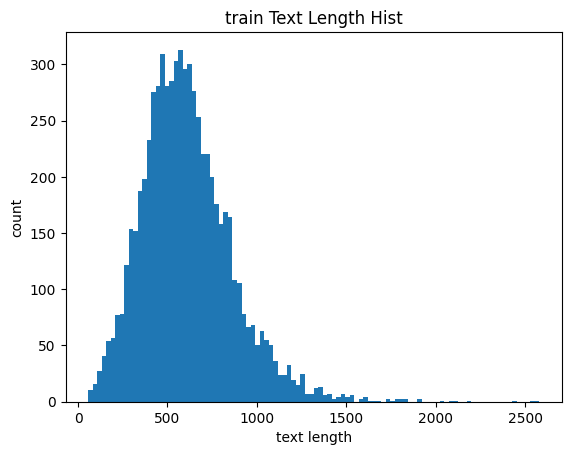

In [19]:
figure_text_len_hist(full_texts=train.get_column("full_text").to_list(), name="train")

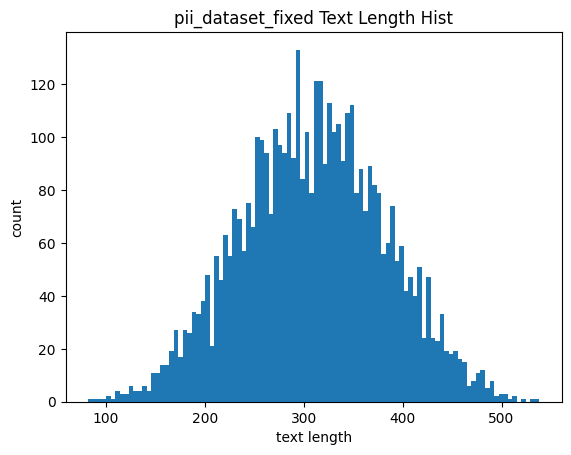

In [17]:
figure_text_len_hist(
    full_texts=pii_dataset_fixed.get_column("text").to_list(), name="pii_dataset_fixed"
)

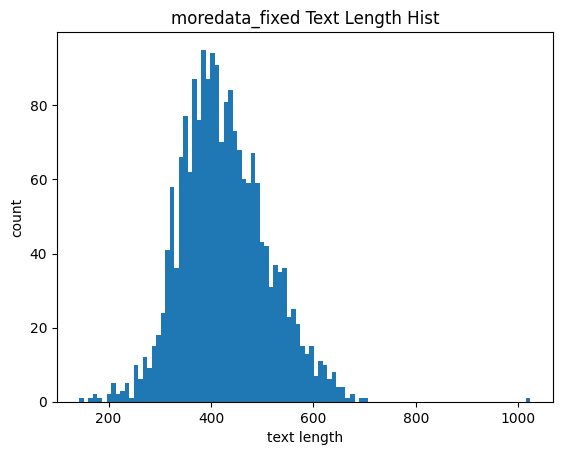

In [22]:
figure_text_len_hist(
    full_texts=moredata_dataset_fixed.get_column("text").to_list(),
    name="moredata_fixed",
)